# Clustering and Pca assignment

In [270]:
#importing all the libraries
#importing numpy and pandas
import numpy as np
import pandas as pd

#importing library for plots
import seaborn as sns
import matplotlib.pyplot as plt

#importing librraires to deal with warnings
import warnings
warnings.filterwarnings('ignore')

#for implimenting pca
from sklearn.decomposition import PCA

#importing standard scalar
from sklearn.preprocessing import StandardScaler
#instantiating object
scaler = StandardScaler()

### 1.Loading the data

In [271]:
df=pd.read_csv(r'C:\Users\Sim\Downloads\Country-data.csv')

## Checking the structure of the data

In [272]:
#checking the structure of the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### Info() indicates that column has no null values

In [274]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [275]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [276]:
df.shape

(167, 10)

#### Shape function tells no of rows and cpolumns in the data set

### 2.Cleaning of the data 

In [277]:
#check for duplicate
ko=df.duplicated(subset=None, keep='first').sum()
ko

0

### Note that data has neither duplicate nor missing values

### 2.a Checking the datatype for each column

In [278]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [279]:
#checking missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Checking and removing the outliers

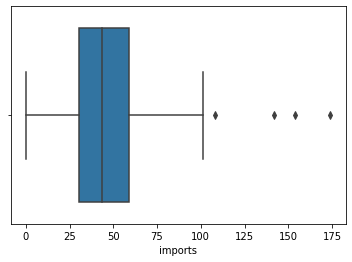

In [282]:
sns.boxplot(x=df['imports'])

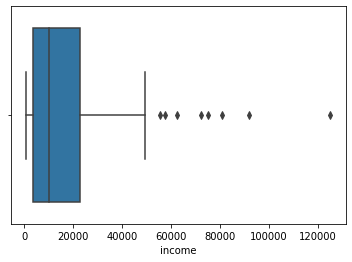

In [283]:
sns.boxplot(x=df['income'])

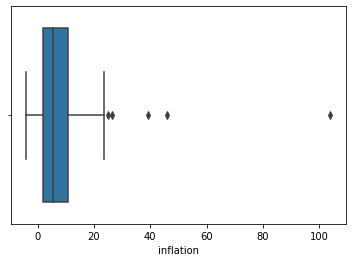

In [284]:
sns.boxplot(x=df['inflation'])

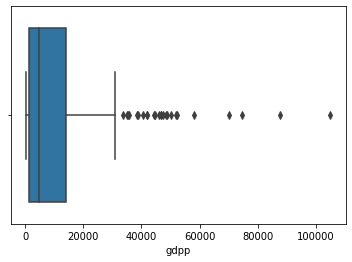

In [285]:
sns.boxplot(x=df['gdpp'])

In [286]:
# We will use IQR method to remove Outliers from the income column
Q1 = df['gdpp'].quantile(0.15)
Q3 = df['gdpp'].quantile(0.85)
IQR = Q3 - Q1
df = df[(df.gdpp >= Q1 - 1.5*IQR) & (df.gdpp <= Q3 + 1.5*IQR)]

In [287]:
#copying the data to a new dataframe
df1 = df.copy()
data_new=df.copy()

In [288]:
data_new.reset_index(drop=True, inplace=True)

In [289]:
df1.pop('country')

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
7                           Australia
8                             Austria
9                          Azerbaijan
10                            Bahamas
11                            Bahrain
12                         Bangladesh
13                           Barbados
14                            Belarus
15                            Belgium
16                             Belize
17                              Benin
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
23                             Brunei
24                           Bulgaria
25                       Burkina Faso
26          

# ANALYSIS

## 1.Principal component analysis

In [290]:
x = scaler.fit_transform(df1)
pca = PCA(0.9)
data_pca = pca.fit_transform(x)
data_pca.shape

(165, 5)

In [291]:
#check the variance of each column
100*df1.var()/sum(df1.var())

child_mort    2.799670e-04
exports       1.116865e-04
health        1.302553e-06
imports       9.197996e-05
income        5.653240e+01
inflation     1.939373e-05
life_expec    1.350434e-05
total_fer     3.953109e-07
gdpp          4.346708e+01
dtype: float64

In [292]:
pca.components_

array([[-0.42792187,  0.26133372,  0.15071012,  0.12878602,  0.39562206,
        -0.19543061,  0.43335872, -0.41170241,  0.39658491],
       [ 0.1098705 ,  0.61435671, -0.22371335,  0.70275162, -0.0544701 ,
        -0.07790541, -0.17032942,  0.07172182, -0.15295236],
       [-0.02172954,  0.21051232, -0.6400477 , -0.25387104,  0.29866838,
         0.61248479,  0.09592897,  0.02100028,  0.08436247],
       [ 0.39973703,  0.11429073,  0.38657413,  0.02331737,  0.4205463 ,
         0.13558875, -0.23716239,  0.39569176,  0.51875158],
       [-0.16377591,  0.04490727,  0.52477265,  0.22653605, -0.22506806,
         0.7369557 ,  0.117375  , -0.12302817, -0.14759308]])

In [293]:
pca.explained_variance_ratio_

array([0.45523703, 0.17398553, 0.13267707, 0.1071351 , 0.07479543])

# check for number of components

## a.Implimenting the scree plot

Text(0, 0.5, 'Cumulative_variance')

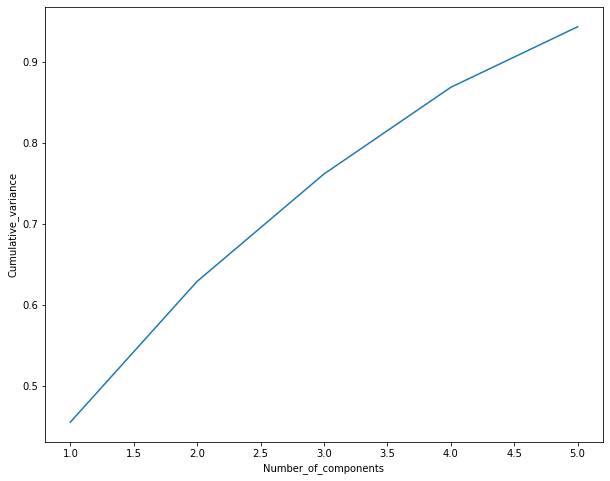

In [294]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number_of_components')
plt.ylabel('Cumulative_variance')

### From above we can conclude that number of components based on scree [plot is 4]

## b.k Means

In [295]:
#importing libraries for running k means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [296]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3031024388385173
For n_clusters=3, the silhouette score is 0.30937299305992677
For n_clusters=4, the silhouette score is 0.32231260728526
For n_clusters=5, the silhouette score is 0.25074681647815594
For n_clusters=6, the silhouette score is 0.2679826773105977


### From k-means we can conclude that no of clusters are 4

In [297]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [298]:
data_new['cluster_km'] = kmeans.labels_

### Analysing data with respect to income gdpp and child_mort

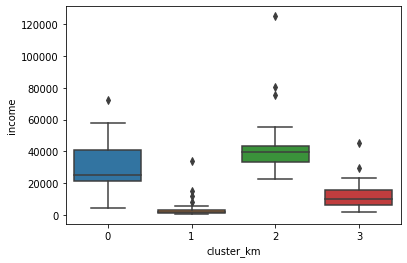

In [299]:
sns.boxplot(x='cluster_km', y='income', data=data_new)

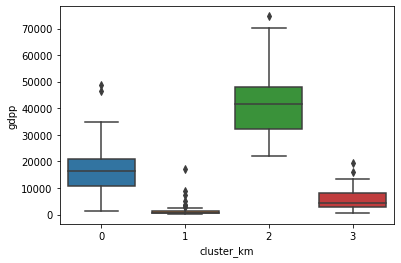

In [300]:
sns.boxplot(x='cluster_km', y='gdpp', data=data_new)

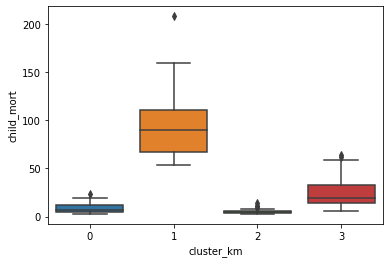

In [301]:
sns.boxplot(x='cluster_km', y='child_mort', data=data_new)

### Run pca

In [304]:
df2 = pd.DataFrame(data_pca, columns=["PC1", "PC2","PC3","PC4","PC5"])
df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.937924,-0.150003,-0.771168,0.917097,-0.145934
1,0.474923,-0.327031,-0.352863,-1.258008,0.149989
2,-0.226082,-0.419403,1.212792,-0.908790,0.170054
3,-2.949465,1.320614,1.653392,1.117471,-0.249838
4,1.104061,0.364324,-0.166404,-0.753244,-0.225775


In [305]:
df2=df2[['PC1','PC2','PC3','PC4']]

In [306]:
y=data_new['cluster_km']

In [307]:
df_final = pd.concat([df2, y], axis=1)

### Analysing data using pair-plot

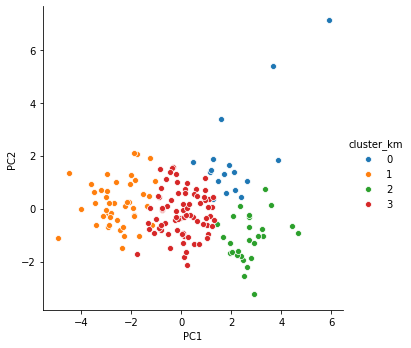

In [308]:
sns.pairplot(data=df_final, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_km", size=5)

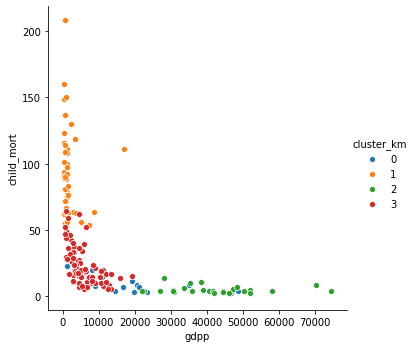

In [309]:
sns.pairplot(data=data_new, x_vars=["gdpp"], y_vars=["child_mort"], hue = "cluster_km", size=5)

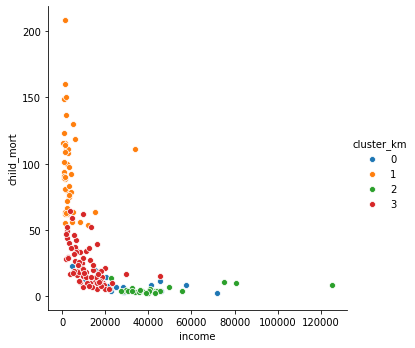

In [310]:
sns.pairplot(data=data_new, x_vars=["income"], y_vars=["child_mort"], hue = "cluster_km", size=5)

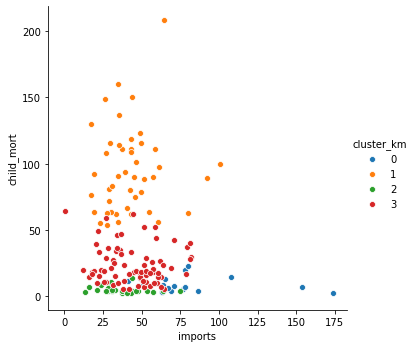

In [311]:
sns.pairplot(data=data_new, x_vars=["imports"], y_vars=["child_mort"], hue = "cluster_km", size=5)

# Part 2 : Heirarchial Clustering

### single linkage heirarchial clustering

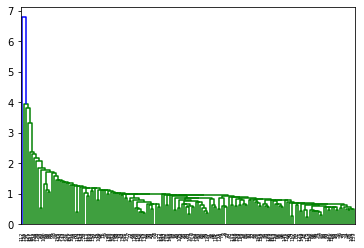

In [313]:
mergings = linkage(data_pca, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

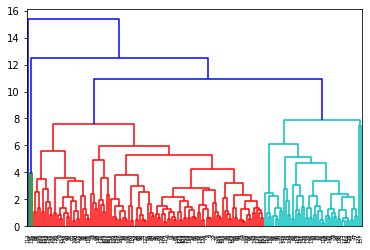

In [317]:
# complete linkage
mergings = linkage(data_pca, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [318]:
cluster_labels = cut_tree(mergings, n_clusters=7).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0,
       0, 2, 2, 1, 1, 0, 2, 2, 0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       2, 0, 4, 2, 1, 2, 1, 1, 1, 2, 2, 5, 1, 1, 0, 1, 2, 1, 1, 2, 0, 3,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 2, 6, 1, 1, 1, 1, 1, 1, 0])

In [319]:
data_new['cluster_h'] = cluster_labels
data_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km,cluster_h
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


In [320]:
y1 = data_new['cluster_h']

In [321]:
df_final2 = pd.concat([df2, y1], axis=1)

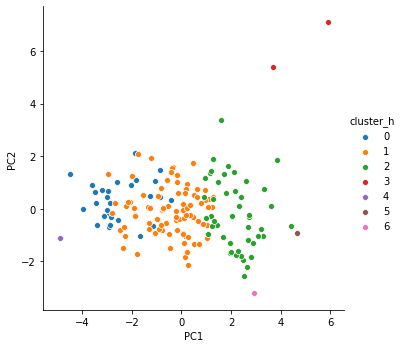

In [322]:
sns.pairplot(data=df_final2, x_vars=["PC1"], y_vars=["PC2"], hue = 'cluster_h', size=5)

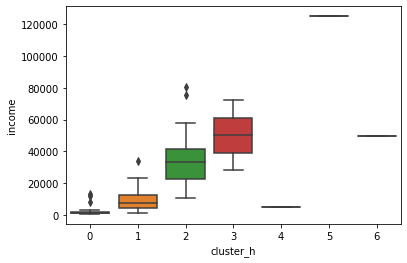

In [323]:
sns.boxplot(x='cluster_h', y='income', data=data_new)

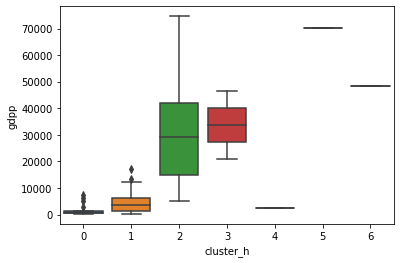

In [324]:
sns.boxplot(x='cluster_h', y='gdpp', data=data_new)

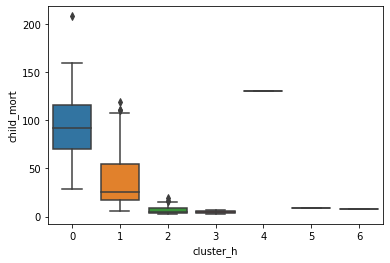

In [325]:
sns.boxplot(x='cluster_h', y='child_mort', data=data_new)

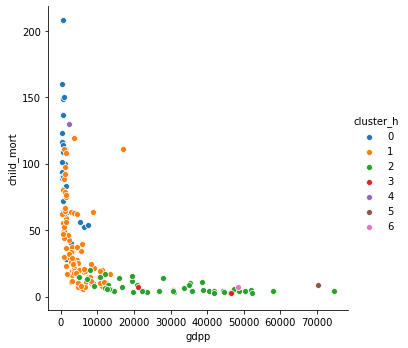

In [326]:
sns.pairplot(data=data_new, x_vars=["gdpp"], y_vars=["child_mort"], hue = "cluster_h", size=5)

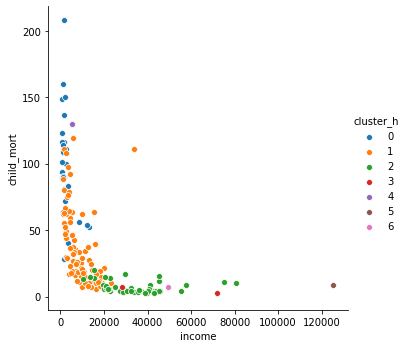

In [327]:
sns.pairplot(data=data_new, x_vars=["income"], y_vars=["child_mort"], hue = "cluster_h", size=5)

# CONCLUSION

In [329]:
#On analysing both heirarchail and k Means we can conclude that k means turns out to be better

In [330]:
result = data_new[data_new.cluster_km==1]

In [331]:
result = result.sort_values(by=['gdpp','income'])

In [332]:
result = result.sort_values(by=['child_mort'],ascending = False)

In [333]:
result.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km,cluster_h
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1,0
130,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,1,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,1,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,1,0
96,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,1,0
